# Игры — Анализ рекламных источников

**Описание проекта**

Заказчик этого исследования — компания «Космические братья»! 🎆 «Космические братья» - команда мобильной игры, которая пользуется большой популярностью, закупила трафик. Нужно сравнить и выявить определяющие выгодность каналов закономерности. Это позволит сделать ставку на потенциально выгодный канал и спланировать дальнейшее перераспределение бюджета. Перед вами данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно 2020го года. 

**Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики. Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. 

В датасете представлены данные по игре пользователей на первом уровне.
Завершение первого уровня требует от игрока выполнения одного из двух условий:
1. Победа над первым врагом
2. Реализация проекта - разработка орбитальной сборки спутников



**Датасет `game_actions.csv`:**
- `event_datetime` — время события;
- `event` — одно из трёх событий:
     1. `building` — объект построен,
     2. `finished_stage_1` — первый уровень завершён,
     3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
     1. `assembly_shop` — сборочный цех,
     2. `spaceport` — космопорт,
     3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
-`project_type` — тип реализованного проекта;


Помимо основного датасета есть два датасета с информацией о рекламных
активностях. Они также помогут в решении задачи.

**Датасет `ad_costs.csv`:**
- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

**Датасет `user_source.csv` содержит колонки:**
- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

**Задачи:**
1. Проанализировать игроков в зависимости от источника перехода, рассмотреть их различия;
2. Проверить, какие каналы хорошо себя показали;
3. Какие источники приводят "качественных пользователей"


**Цель исследования** — Определить выгодные, не выгодные каналы для планирования дальнейшей ставки распределения бюджета. А также проверить две гипотезы:
1. Время завершения уровня различается в зависимости способа прохождения: 
        через реализацию проекта,
        через победу над первым игроком.
2. Доля прохождения уровней различается в зависимости от источника

## шаг. Открытие файла с данными и изучение общей информации.
- Открыть датасеты
- Вывести и изучить основную информацию о датасетах

Импортируем библиотеки, которыми будем пользоваться

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format 
import matplotlib.pyplot as plt                          
import seaborn as sns  
from scipy import stats as st
import math as mth



Откроем файлы с данными и запишем их как датафреймы `game`, `costs`, `users`

In [2]:
game = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv', parse_dates=['event_datetime'])
costs =  pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv', parse_dates=['day'])
users =  pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')

Рассмотрим первые 5 строк и основную информацию датафрейма `game`

In [3]:
def information(dataframe):
    display(dataframe.head())
    dataframe.info()
    

In [4]:
information(game)
information(costs)
information(users)
costs.describe()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


,cost
count,28.00
mean,271.56
std,286.87
min,23.31
25%,66.75
50%,160.06
75%,349.03
max,969.14


Видим, что
- В датафрейме `game` всего 135640 строк, позднее рассмотрим долю пропусков;
- Всего строк в датафрейме `costs` - 28, отсутствуют пропуски
- В `users` строк 13576, 
     - пропуски отсутствуют, 
     - минимальное значение `cost` - 23.31
     - максимальное значение - 969.14
     - разброс большой
                                                    


## шаг. Подготовка данных.

### Проверить корректность названий столбцов;








Выведем наименования всех столбцов таблиц `game`, `costs`, `users`

In [5]:
print(game.columns.tolist())
print(costs.columns.tolist())
print(users.columns.tolist())

['event_datetime', 'event', 'building_type', 'user_id', 'project_type']
['source', 'day', 'cost']
['user_id', 'source']


Переименуем столбец `event_datetime` в `date` для удобства

In [6]:
game = game.rename(columns = {'event_datetime':'date'})

Все столбцы имеют корректное название

### Преобразование данных в нужные типы. Описать, в каких столбцах заменили тип данных и почему;

In [7]:
costs['day'] = costs['day'].dt.date

### Обработка дубликатов;

Для начала проверим датафреймы на наличие явных дубликатов

In [8]:
print(game.duplicated().sum())
print(costs.duplicated().sum())
users.duplicated().sum()

1
0


0

Удалим найденный явный дубликат и проверим удаление


In [9]:
game = game.drop_duplicates()
game = game.reset_index(drop = True)
game.duplicated().sum()

0

Далее рассмотрим строки с одинаковыми `user_id` и `date`

In [10]:
game.loc[game.duplicated(subset = ['user_id', 'date']) == True]

,date,event,building_type,user_id,project_type


Пусто, оставим в таком виде.

In [11]:
game['date'] = game['date'].dt.date

### Обработка пропусков;


Проверим долю пропусков в датафрейме `game`, у остальных двух отсутствуют пропуски по всем столбцам.

In [12]:
pd.DataFrame(round(game.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
date,0.000000
event,0.000000
building_type,5.700000
user_id,0.000000
project_type,98.600000


Видим что огромная доля пропусков идет на столбец `project_type`.

Детальнее рассмотрим данные с ненулевыми значениями данного столбца. Выведем все уникальные значения столбца `event`.

In [13]:
game.query('project_type.isna() == False')['event'].unique().tolist()

['project']

Рассмотрим все уникальные значения столбца `project_type`

In [14]:
game['project_type'].unique().tolist()

[nan, 'satellite_orbital_assembly']

Имеется только единственное ненулевое значение `satellite_orbital_assembly` значит мы можем избавиться от столбца `project_type`, так как значение `project` в столбце `event` уже подразумевает о разработке орбитальной сборки спутников.

In [15]:
game = game.drop(columns=['project_type'])
list(game.columns)

['date', 'event', 'building_type', 'user_id']

Что касаемо пропусков в столбце `building_type`, рассмотрим так же. Выведем количество ненулевых значений и все уникальные значения столбца event.

In [16]:
print(len(game.query('building_type.isna() == False')))
game.query('building_type.isna() == False')['event'].unique().tolist()

127956


['building']

Далее выведем количество значений `building` во всем датафрейме `game` и сравним.

In [17]:
print(len(game.query('event == "building"')))

127956


Количества так же совпадают, то есть если в столбце `event` стоит `building` значит, что там есть постройка. Рассмотрим виды построек

In [18]:
game['building_type'].unique().tolist()

['assembly_shop', 'spaceport', nan, 'research_center']

Так как имеются несколько зданий построек, мы не можем просто взять и избавиться от столбца. Поэтому остальные пропуски просто оставим как есть.

## шаг. Исследовательский анализ данных.

### Подробное рассмотрение информации датафрейма `game_actions.csv`


Рассмотрим уникальные значения столбца `event`, выведем наксимальную и минимальную даты столбца `date` а также выведем количество уникальных пользователей в данном датафрейме.

In [19]:
print(game['event'].unique())
print(game['date'].min())
print(game['date'].max())
len(game['user_id'].unique())

['building' 'finished_stage_1' 'project']
2020-05-04
2020-06-05


13576

### Подробное рассмотрение информации датафрейма `ad_costs.csv`

Рассмотрим уникальные значения столбца `source`, выведем наксимальную и минимальную даты столбца `day` а также еще раз  cписок характерных значений столбца `cost`

In [20]:
display(costs['source'].unique().tolist())
print(costs['day'].min())
print(costs['day'].max())
costs.describe()

['facebook_ads',
 'instagram_new_adverts',
 'yandex_direct',
 'youtube_channel_reklama']

2020-05-03
2020-05-09


,cost
count,28.00
mean,271.56
std,286.87
min,23.31
25%,66.75
50%,160.06
75%,349.03
max,969.14


### Подробное рассмотрение информации датафрейма `user_source.csv`

In [21]:
users.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [22]:
print(len(users['user_id'].unique()))
users['source'].unique().tolist()

13576


['facebook_ads',
 'yandex_direct',
 'youtube_channel_reklama',
 'instagram_new_adverts']

### Объединение двух таблиц `game` и `users`, по столбцу `user_id`

Объединим две данные таблицы по столбцу `user_id`

In [23]:
df = pd.merge(game, users, on="user_id")

In [24]:
df.head()

,date,event,building_type,user_id,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama


### Разбивка событий по типу и по источнику канала

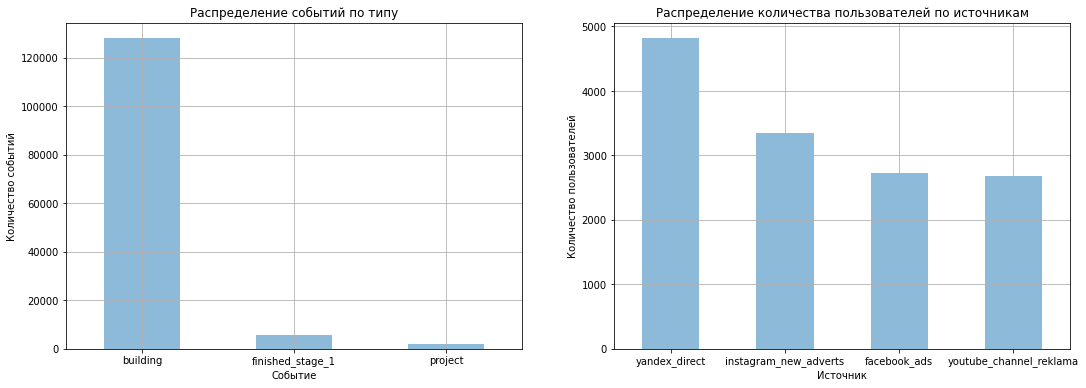

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df['event'].value_counts().plot(kind='bar', ax=ax1, figsize=(18,6), alpha=0.5)
plt.grid()
users['source'].value_counts().plot(kind='bar', ax=ax2, figsize=(18,6), alpha=0.5)
ylab = ax1.set_ylabel('Количество событий')
xlab = ax1.set_xlabel('Событие')
ax1.set_title("Распределение событий по типу")
ylab = ax2.set_ylabel('Количество пользователей')
xlab = ax2.set_xlabel('Источник')
ax2.set_title("Распределение количества пользователей по источникам")
ax1.tick_params(rotation = 0)
ax2.tick_params(rotation = 0)
ax1.grid()
ax2.grid()


plt.show()

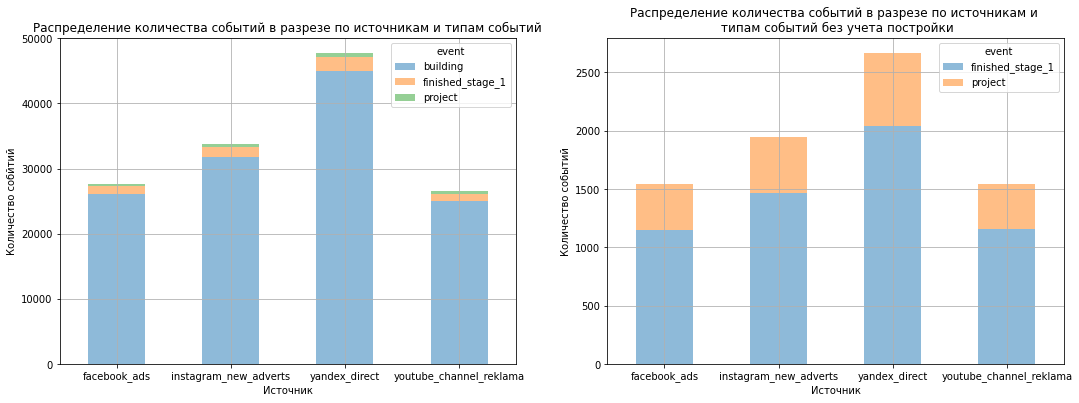

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df.groupby(['source', 'event']).size().unstack().plot(kind='bar', stacked=True, ax=ax1, figsize=(18,6), alpha=0.5)

df.query('event != "building"').groupby(['source', 'event']).size().unstack().plot(kind='bar', stacked=True, ax=ax2, figsize=(18,6), alpha=0.5)

ylab = ax1.set_ylabel('Количество собйтий')
xlab = ax1.set_xlabel('Источник')
ax1.set_title("Распределение количества событий в разрезе по источникам и типам событий")

ylab = ax2.set_ylabel('Количество событий')
xlab = ax2.set_xlabel('Источник')
ax2.set_title("Распределение количества событий в разрезе по источникам и \n типам событий без учета постройки")
ax1.tick_params(rotation = 0)
ax2.tick_params(rotation = 0)
ax1.grid()
ax2.grid()


plt.show()

по результатам таблиц, видим что 
- больше всего событий `building`, скорее всего это обусловлено тем, что один пользователь может построить несколько зданий.
- наибольшее количество пользователей пришли с источника `yandex_direct`
- больше всего получили `finished_stage_1` пользователи пришедшие с источника `yandex_direct`
- Наибольшее количество зданий построили пользователи с источника `yandex_direct`, возможно это связано с тем, что там наибольшее количество пользователей. 

### Распределение количества пользователей по признаку завершения уровня и источнику канала

Для этого нужно создать отдельный датафрейм, с уникальными значениями пользователей.

Для начала найдем даты когда игроки получили `project`, `finished_stage_1` 

In [27]:
project_date = df[df['event'] == 'project'].sort_values(by = ['user_id', 'date']).groupby('user_id')['date'].first()
finish_date = df[df['event'] == 'finished_stage_1'].sort_values(by = ['user_id', 'date']).groupby('user_id')['date'].first()

Далее составим датафрейм

In [28]:
users_unique = pd.merge(users, project_date, on = 'user_id', how='left')
users_unique = users_unique.rename(columns = {'date':'project_date'})

users_unique = pd.merge(users_unique, finish_date, on = 'user_id', how='left')
users_unique = users_unique.rename(columns = {'date':'finish_date'})

In [29]:
users_unique['is_finished'] = pd.notna(users_unique['finish_date'])
users_unique['project_finished'] = pd.notna(users_unique['project_date'])


In [30]:
users_unique.head()

,user_id,source,project_date,finish_date,is_finished,project_finished
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,NaN,NaN,False,False
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,NaN,NaN,False,False
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,NaN,NaN,False,False
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,NaN,2020-05-12,True,False
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,NaN,NaN,False,False


Выведем, долю прохождения уровня среди всех пользователей


In [31]:
print('Доля завершивших первый уровень')
round(len(users_unique.query('is_finished == True'))/len(users_unique) *100, 2)

Доля завершивших первый уровень


42.85

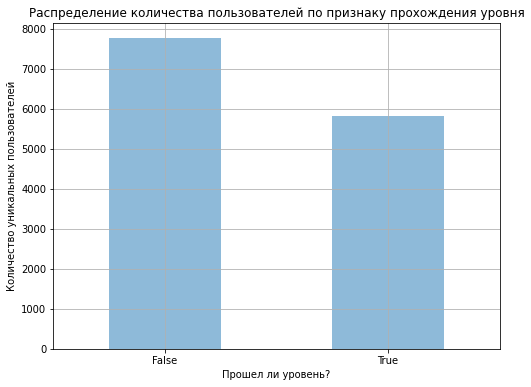

In [32]:
users_unique.groupby(['is_finished']).size().plot(kind='bar',figsize=(8,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества пользователей по признаку прохождения уровня')
plt.xlabel('Прошел ли уровень?')
plt.ylabel('Количество уникальных пользователей')
plt.grid()

plt.show()

Рассмотрим количество пользователей победивших первого врага, пользователей - исследователей и пользователей не прошедших уровень

In [33]:
#Количество пользователей - исследователей( пользователи, построившие станцию и прошли уровень)
v1 = len(users_unique.query('project_finished == True'))
#Количество пользователей, победивших первого врага и прошедших уровень автоматически
v2 = len(users_unique.query('is_finished == True & project_finished == False'))
#Количество пользователей, не прошедших уровень
v3 = len(users_unique.query('is_finished == False & project_finished == False'))

d = {'researcher': [v1], 'win_enemy': [v2], 'not_finished': [v3]}
data = pd.DataFrame(data=d)
data

,researcher,win_enemy,not_finished
0,1866,3951,7759


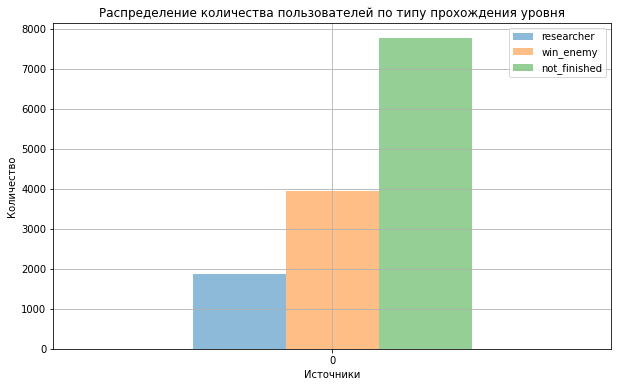

In [34]:
data.plot(kind='bar',figsize=(10,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества пользователей по типу прохождения уровня')
plt.xlabel('Источники')
plt.ylabel('Количество')
plt.grid()

plt.show()

Выводы:
- Доля пользователей завершивших первый уровень составляет 42.85%
- Доля пользователей завершивших уровень меньше доли не завершивших уровень
- Игроки чаще проходят уровень побеждая первого врага
- Игроков исследователей оказалось почти в два раза меньше игроков прошедших уровень победив своего первого врага

Рассмотрим столбчатую диаграмму пользователей по признаку прохождения первого уровня в разрезе по источникам канала

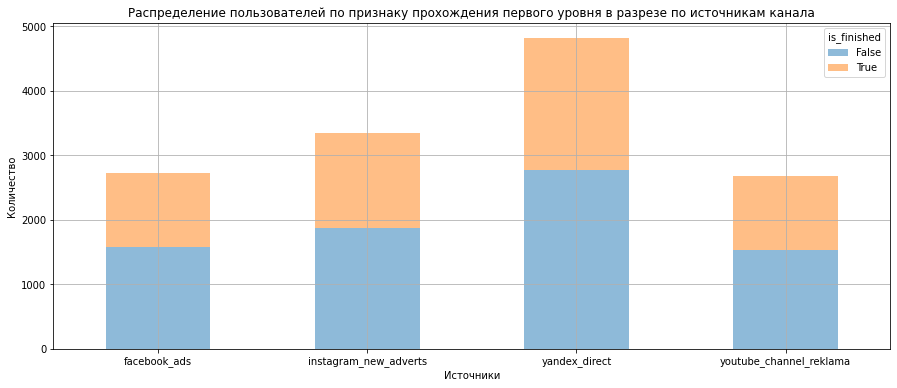

In [35]:
users_unique.groupby(['source', 'is_finished']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Распределение пользователей по признаку прохождения первого уровня в разрезе по источникам канала')
plt.xlabel('Источники')
plt.ylabel('Количество')
plt.grid()

plt.show()

Доли пользователей прошедших первый уровень и не прошедших первый уровень в разрезе по источникам не сильно отличаются.

Распределение количества пользователей с значением finished_stage_1 в разрезе по источникам канала

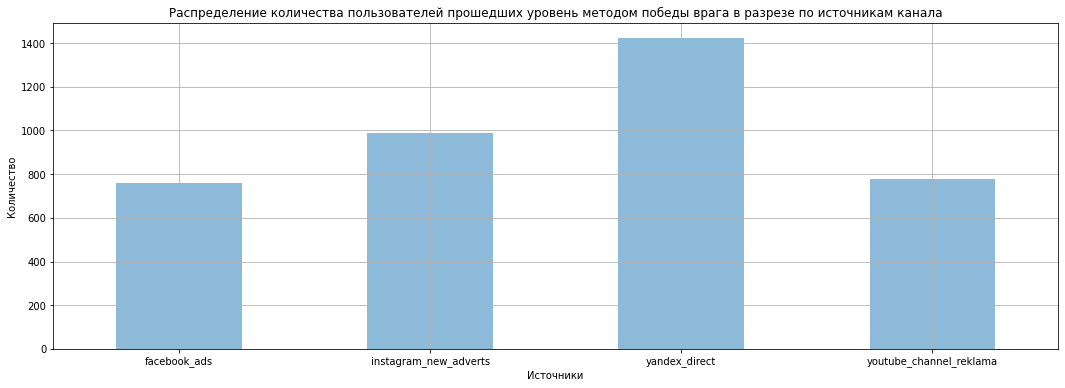

In [36]:
users_unique.query('is_finished == True & project_finished == False').groupby(['source']).size().plot(kind='bar',figsize=(18,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества пользователей прошедших уровень методом победы врага в разрезе по источникам канала')
plt.xlabel('Источники')
plt.ylabel('Количество')
plt.grid()

plt.show()

Далее выведем с событием `project`

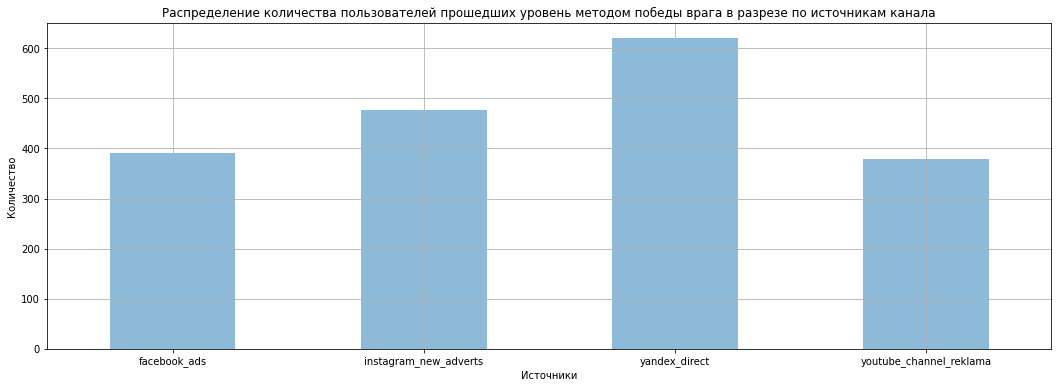

In [37]:
users_unique.query('is_finished == True & project_finished == True').groupby(['source']).size().plot(kind='bar',figsize=(18,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества пользователей прошедших уровень методом победы врага в разрезе по источникам канала')
plt.xlabel('Источники')
plt.ylabel('Количество')
plt.grid()

plt.show()

- Доли пользователей прошедших первый уровень двумя разными способами также не сильно отличаются

###  Среднее количество дней для завершения уровня в разрезе по источнику канала

Для начала, выведем первый и последний дни игры пользователя, и соединим с датафреймом с уникальными пользователями

In [38]:
first_date = df.sort_values(by=['user_id', 'date']).groupby('user_id')['date'].first()
last_date = df.sort_values(by=['user_id', 'date']).groupby('user_id')['date'].last()


In [39]:
users_unique = pd.merge(users_unique, first_date, on = 'user_id', how='left')
users_unique = users_unique.rename(columns = {'date':'first_date'})

users_unique = pd.merge(users_unique, last_date, on = 'user_id', how='left')
users_unique = users_unique.rename(columns = {'date':'last_date'})


In [40]:
users_unique.head()

,user_id,source,project_date,finish_date,is_finished,project_finished,first_date,last_date
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,NaN,NaN,False,False,2020-05-06,2020-05-20
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,NaN,NaN,False,False,2020-05-06,2020-05-18
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,NaN,NaN,False,False,2020-05-05,2020-05-14
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,NaN,2020-05-12,True,False,2020-05-05,2020-05-12
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,NaN,NaN,False,False,2020-05-05,2020-05-22


Далее высчитаем сколько дней проводят пользователи в игре

In [41]:
users_unique['days'] = (users_unique['last_date'] - users_unique['first_date']).dt.days 
users_unique.head()

,user_id,source,project_date,finish_date,is_finished,project_finished,first_date,last_date,days
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,NaN,NaN,False,False,2020-05-06,2020-05-20,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,NaN,NaN,False,False,2020-05-06,2020-05-18,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,NaN,NaN,False,False,2020-05-05,2020-05-14,9
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,NaN,2020-05-12,True,False,2020-05-05,2020-05-12,7
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,NaN,NaN,False,False,2020-05-05,2020-05-22,17


Выведем столбчатую диаграмму, показывающую на какой день пользователи заканчивают первый уровень

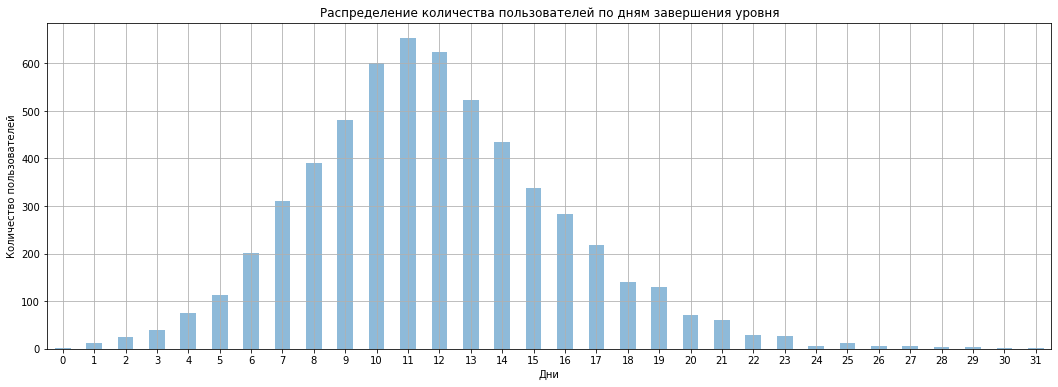

In [42]:
users_unique.query('is_finished == True').groupby(['days']).size().plot(kind='bar',  figsize=(18,6), alpha=0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества пользователей по дням завершения уровня')
plt.xlabel('Дни')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()
plt.show()

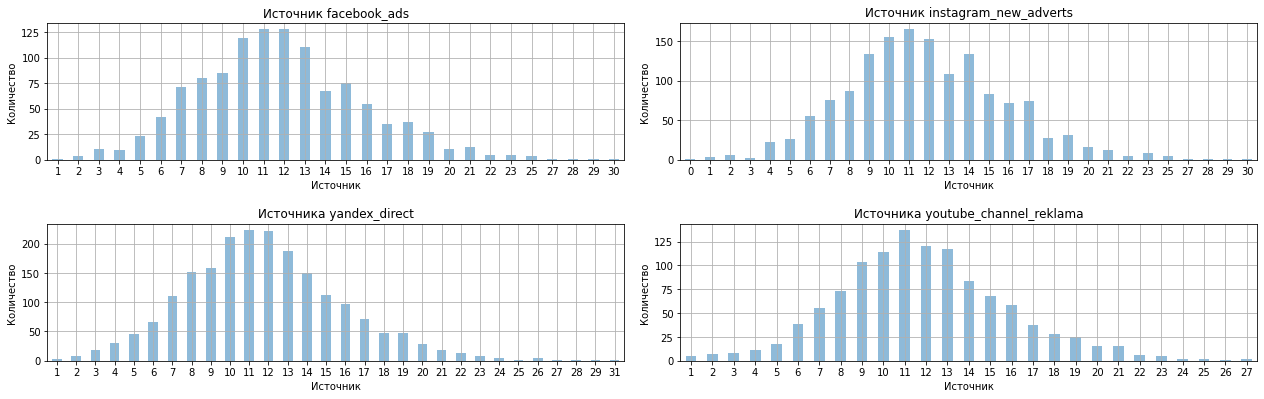

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
users_unique.query('is_finished == True & source == "facebook_ads"').groupby(['days']).size().plot(kind='bar',  figsize=(18,6),  ax=ax1, alpha=0.5)
users_unique.query('is_finished == True & source == "instagram_new_adverts"').groupby(['days']).size().plot(kind='bar',  figsize=(18,6), ax=ax2, alpha=0.5)

users_unique.query('is_finished == True & source == "yandex_direct"').groupby(['days']).size().plot(kind='bar',  figsize=(18,6), ax=ax3, alpha=0.5)
users_unique.query('is_finished == True & source == "youtube_channel_reklama"').groupby(['days']).size().plot(kind='bar',  figsize=(18,6), ax=ax4, alpha=0.5)

fig.tight_layout(pad=3.0)

ylab = ax1.set_ylabel('Количество')
xlab = ax1.set_xlabel('Источник')
ylab = ax2.set_ylabel('Количество')
xlab = ax2.set_xlabel('Источник')
ylab = ax3.set_ylabel('Количество')
xlab = ax3.set_xlabel('Источник')
ylab = ax4.set_ylabel('Количество')
xlab = ax4.set_xlabel('Источник')

ax1.set_title("Источник facebook_ads")
ax2.set_title("Источник instagram_new_adverts")
ax3.set_title("Источника yandex_direct")
ax4.set_title("Источника youtube_channel_reklama")

ax1.tick_params(rotation = 0)
ax2.tick_params(rotation = 0)
ax3.tick_params(rotation = 0)
ax4.tick_params(rotation = 0)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

По результатам графиков можно определить, что:
- Максимальное количество пользователей закончили первый уровень на 11-й день игры
- По данным таблиц по источникам, также видим, что максимальное количество пользователей заканчивают первый уровень на 11-й день игры

###  Исследование построек по типам зданий

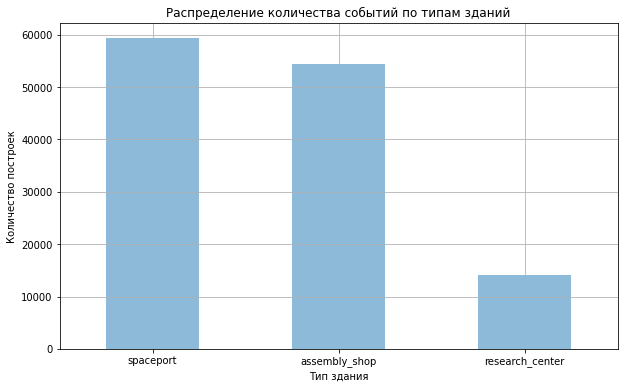

In [45]:
df.groupby(['building_type']).size().sort_values(ascending = False).plot(kind='bar', figsize=(10,6), alpha=0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества событий по типам зданий')
plt.xlabel('Тип здания')
plt.ylabel('Количество построек')
plt.grid()

plt.show()

- Пользователи чаще всего строят `spaceport` и `assembly_shop`

Далее рассмотрим распределение количества зданий по типам в разрезе по дням, для этого добавим в датафрейм значения первого, последнего дней и количество дней проведенных в игре

In [46]:
first_date = df.sort_values(by=['user_id', 'date']).groupby('user_id')['date'].first()
last_date = df.sort_values(by=['user_id', 'date']).groupby('user_id')['date'].last()


In [47]:
df = pd.merge(df, first_date, on = 'user_id', how='left')
df = df.rename(columns = {'date_x':'date', 'date_y':'first_day'})

df = pd.merge(df, last_date, on = 'user_id', how='left')
df = df.rename(columns = {'date_x':'date', 'date_y':'last_day'})

df.head()

,date,event,building_type,user_id,source,first_day,last_day
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10


In [48]:
df['days'] = (df['date'] - df['first_day']).dt.days 

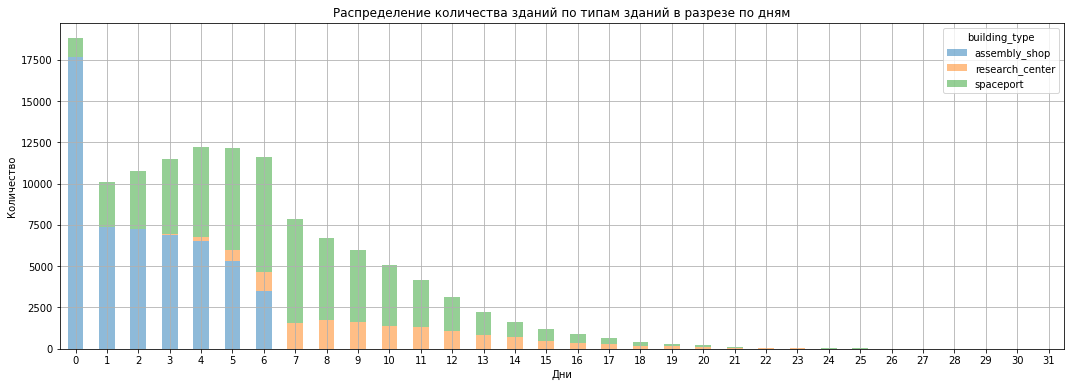

In [49]:
df.groupby(['days', 'building_type']).size().unstack().plot(kind='bar', stacked=True,  figsize=(18,6), alpha=0.5)
plt.xticks(rotation = 0)
plt.title('Распределение количества зданий по типам зданий в разрезе по дням')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.grid()

plt.show()

Дополнительно рассмотрим количество зданий в разрезе по датам

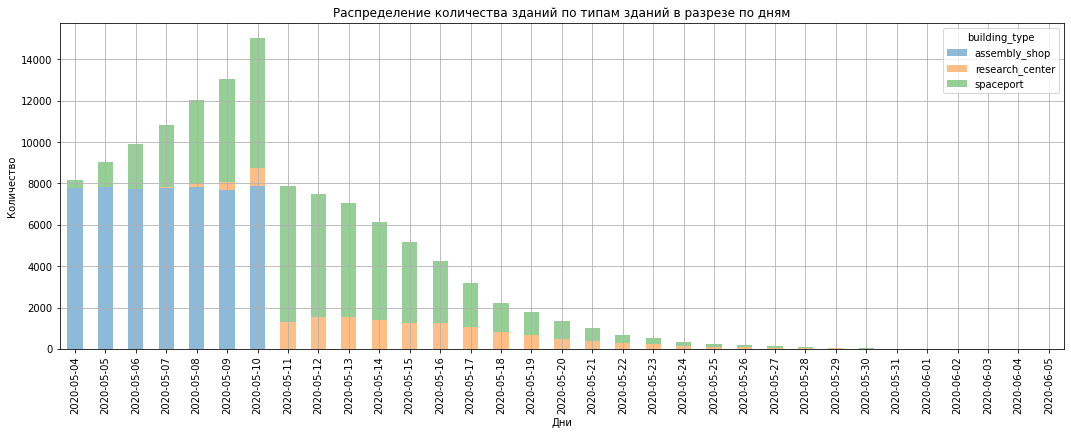

In [50]:
df.groupby(['date', 'building_type']).size().unstack().plot(kind='bar', stacked=True,  figsize=(18,6), alpha=0.5)
plt.xticks(rotation = 90)
plt.title('Распределение количества зданий по типам зданий в разрезе по дням')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.grid()

plt.show()

Также, можем рассчитать среднее количество зданий которое построили пользователи

In [51]:
print("среднее количество зданий которые построили пользователи")
round(len(df.query('building_type.isna()== False'))/df['user_id'].nunique())

среднее количество зданий которые построили пользователи


9

Среднее количество типов зданий которые построили пользователи

In [52]:
print("Среднее количество типов зданий которые построили пользователи")
round(df.query('building_type.isna()== False').groupby(['user_id', 'building_type']).size().groupby('building_type').mean())


Среднее количество типов зданий которые построили пользователи


building_type
assembly_shop     4.00
research_center   2.00
spaceport         4.00
dtype: float64

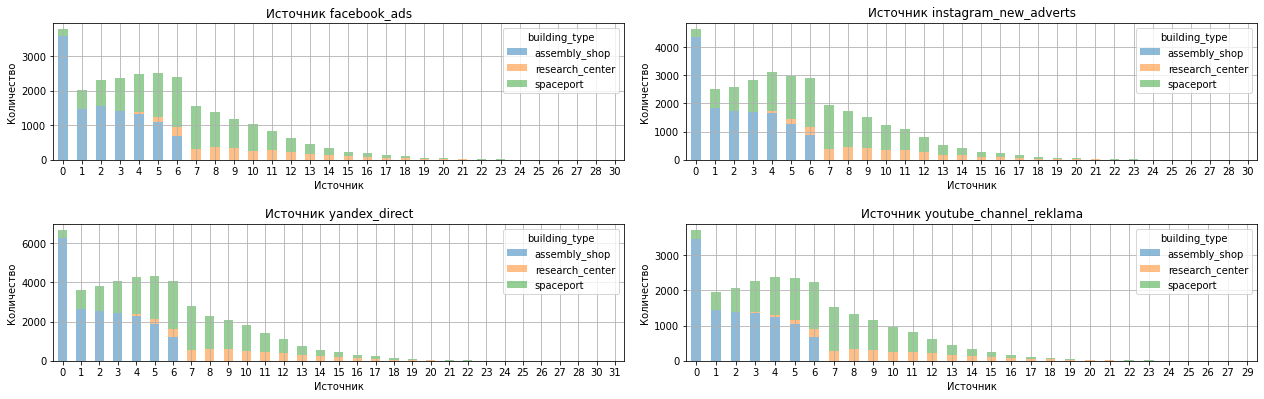

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
df.query('source == "facebook_ads"').groupby(['days', 'building_type']).size().unstack().plot(kind='bar', ax=ax1, stacked=True,  figsize=(18,6), alpha=0.5)
df.query('source == "instagram_new_adverts"').groupby(['days', 'building_type']).size().unstack().plot(kind='bar', ax=ax2, stacked=True,  figsize=(18,6), alpha=0.5)

df.query('source == "yandex_direct"').groupby(['days', 'building_type']).size().unstack().plot(kind='bar', ax=ax3, stacked=True,  figsize=(18,6), alpha=0.5)
df.query('source == "youtube_channel_reklama"').groupby(['days', 'building_type']).size().unstack().plot(kind='bar', ax=ax4, stacked=True,  figsize=(18,6), alpha=0.5)

fig.tight_layout(pad=3.0)

ylab = ax1.set_ylabel('Количество')
xlab = ax1.set_xlabel('Источник')
ylab = ax2.set_ylabel('Количество')
xlab = ax2.set_xlabel('Источник')
ylab = ax3.set_ylabel('Количество')
xlab = ax3.set_xlabel('Источник')
ylab = ax4.set_ylabel('Количество')
xlab = ax4.set_xlabel('Источник')

ax1.set_title("Источник facebook_ads")
ax2.set_title("Источник instagram_new_adverts")
ax3.set_title("Источник yandex_direct")
ax4.set_title("Источник youtube_channel_reklama")

ax1.tick_params(rotation = 0)
ax2.tick_params(rotation = 0)
ax3.tick_params(rotation = 0)
ax4.tick_params(rotation = 0)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()


По результатам данных таблиц, можно сказать, что:
- первые 6 дней с начала игры пользователи строят `assembly_shop`, далее постройка данного дания прекращается, что говорит о том , что его можно строить только в первые 6 дней.
- строительство `research_center` разрешено с 3-4го дня игры
- Разница в динамике постройки зданий в разрезе источников минимальная. Доля распределения построек по датам между источниками почти одинаковая
- В среднем пользователи построили по 9 зданий
- В среднем, пользователи строили по:
    - 4 здания - `assembly_shop`     
    - 2 здания - `research_center`   
    - 4 здания - `spaceport`         

## шаг. Оценка каналов привлечения пользователей

###  Определим минимальную и максимальную даты привлечения пользователей.

In [54]:
costs

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


In [55]:
print('Минимальная дата =', costs['day'].min())
print('Максимальная дата =', costs['day'].max())


Минимальная дата = 2020-05-03
Максимальная дата = 2020-05-09


У всех источников даты оплаты рекламы в одни и те же дни, начиная с 2020-05-03 ежедневно до 2020-05-09

### Посчитаем общую сумму расходов на привлечение пользователей.

In [56]:
print('Общая сумма расходов на привлечение пользователей')
round(costs['cost'].sum(), 2)

Общая сумма расходов на привлечение пользователей


7603.58

### Распределение бюджета по рекламным источникам

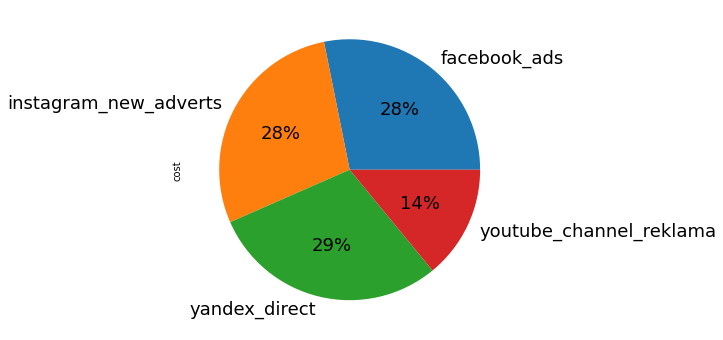

In [57]:
costs.groupby('source')['cost'].sum().plot(kind='pie',figsize=(18,6), autopct='%.0f%%', textprops={'fontsize':18})

plt.show()

Cумма расходов на привлечение пользователей facebook_ads

In [58]:
pd.DataFrame(costs.groupby(['source']).sum().sort_values(by = 'cost', ascending =False)).style.background_gradient('coolwarm')

,cost
source,
yandex_direct,2233.111449
instagram_new_adverts,2161.441691
facebook_ads,2140.904643
youtube_channel_reklama,1068.119204


Так как реклама, за которую оплатили, откручивается только на следующий день, поэтому скорректируем даты

In [59]:
costs['day'] = (costs['day'] + pd.DateOffset(1)).dt.date

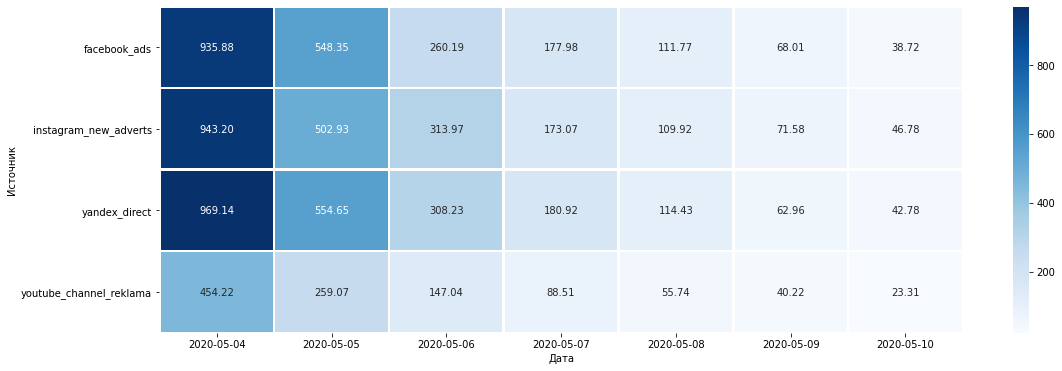

In [60]:
df_wide = costs.pivot_table( index='source', columns='day', values='cost')
plt.figure(figsize=(18,6))
sns.heatmap(df_wide,  annot=True, linewidth=1.5, fmt=".2f", cmap='Blues')
plt.xlabel('Дата')
plt.ylabel('Источник')
plt.show()

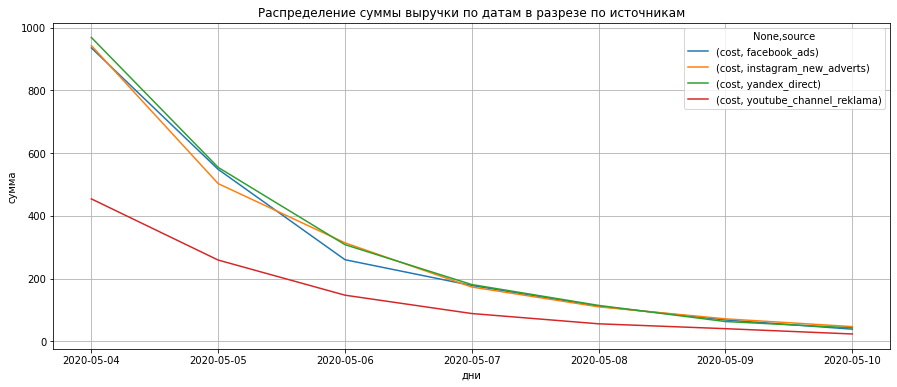

In [61]:
costs.groupby(['day','source']).sum().unstack().plot(kind = 'line', figsize=(15,6))
plt.title('Распределение суммы выручки по датам в разрезе по источникам')
plt.xlabel('дни')
plt.ylabel('сумма')
plt.grid()
plt.show()

- Наибольшая сумма для привлечения пользователей идет на источник `yandex_direct`, чуть больше чем `instagram_new_adverts` , `facebook_ads`.
- Наименьшая сумма для привлечения пользователей идет на источник `youtube_channel_reklama`
- Но в то же время нужно учитывать что количество привлеченных пользователей с источника  `yandex_direct` наибольшее 
- И с наименьшее с источника `youtube_channel_reklama`

### Стоимость привлечения одного пользователя для каждого источника.

Рассчистаем стоимость привлечения одного пользователя для каждого источника

In [62]:
df.head()

,date,event,building_type,user_id,source,first_day,last_day,days
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10,0
1,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10,1
2,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10,1
3,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10,1
4,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,youtube_channel_reklama,2020-05-04,2020-05-10,2


In [63]:
cost_per_person = costs.groupby(['source']).sum()
cost_per_person1 =(pd.pivot_table(df, index = ['source'], values = ['user_id'], aggfunc='nunique'))
cost_per_person = pd.merge(cost_per_person, cost_per_person1, on="source")
cost_per_person['cost_pp']=cost_per_person['cost']/cost_per_person['user_id']

display(cost_per_person)

,cost,user_id,cost_pp
source,,,
facebook_ads,"2,140.90",2726,0.79
instagram_new_adverts,"2,161.44",3347,0.65
yandex_direct,"2,233.11",4817,0.46
youtube_channel_reklama,"1,068.12",2686,0.40


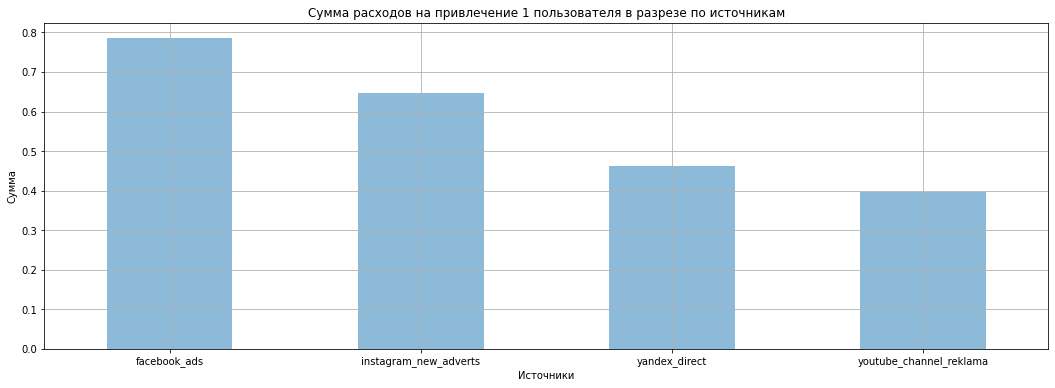

In [64]:
cost_per_person['cost_pp'].plot(kind='bar',figsize=(18,6), alpha = 0.5)
plt.xticks(rotation = 0)
plt.title('Cумма расходов на привлечение 1 пользователя в разрезе по источникам')
plt.xlabel('Источники')
plt.ylabel('Сумма')
plt.grid()
plt.show()

Оказалось, что самое дорогое привлечение приходится на источник `facebook_ads` и самое дешевое привлечение идет с `youtube_channel_reklama` 

## шаг. Проверка гипотез


### Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта,  через победу над первым игроком.


Проверим гипотезу: Время завершения уровня различается в зависимости способа прохождения: через реализацию проекта, через победу над первым игроком

H0: Время завершения уровня одинаково

H1: Время завершения уровня различно

In [65]:
project_date = df[df['event'] == 'project'].sort_values(by = ['user_id', 'date']).groupby('user_id')['date'].first()
finish_date = df[df['event'] == 'finished_stage_1'].sort_values(by = ['user_id', 'date']).groupby('user_id')['date'].first()

df = pd.merge(df, project_date, on = 'user_id', how='left')
df = df.rename(columns = {'date_x':'date', 'date_y':'project_date'})

df = pd.merge(df, finish_date, on = 'user_id', how='left')
df = df.rename(columns = {'date_x':'date', 'date_y':'finish_date'})


In [66]:
project_end_time = df[(df['project_date'].isna()== False) & (df['finish_date'].isna()== False)]['days']

finish_end_time =  df[(df['project_date'].isna()== True) & (df['finish_date'].isna()== False)]['days']

In [67]:
alpha = 0.05

results = st.ttest_ind(
    project_end_time,
    finish_end_time,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.73450987002769e-127
Отвергаем нулевую гипотезу


 Время завершения уровня различно в зависимости от способа прохождения: через реализацию проекта, через победу над первым игроком.

###  Доля прохождения уровней  различается в зависимости от источника

Проверим гипотезу: Доля прохождения уровней различается в зависимости от источника

H0: Доля прохождения уровней одинакова

H1: Доля прохождения уровней различна

In [70]:
def hypot(value1, value2):
    df1 = users_unique.query('source == @value1')
    df1_finish_count = len(df1.query("is_finished == True"))
    df1_all_count = len(df1)

    df2 = users_unique.query('source == @value2')
    df2_finish_count = len(df2.query("is_finished == True"))
    df2_all_count = len(df2)

    # пропорция успехов в первой группе:
    p1 = df1_finish_count/df1_all_count

    # пропорция успехов во второй группе:
    p2 = df2_finish_count/df2_all_count

    # пропорция успехов в комбинированном датасете:
    p_combined = (df1_finish_count + df2_finish_count) / (df1_all_count + df2_all_count)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/df1_all_count + 1/df2_all_count))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [69]:
print("yandex_direct и facebook_ads")
hypot('yandex_direct', 'facebook_ads')

print("\nyandex_direct и youtube_channel_reklama")
hypot('yandex_direct', 'youtube_channel_reklama')

print("\nyandex_direct и instagram_new_adverts")
hypot('yandex_direct', 'instagram_new_adverts')


print("\n\nfacebook_ads и youtube_channel_reklama")
hypot('facebook_ads', 'youtube_channel_reklama')
print("\nfacebook_ads и instagram_new_adverts")
hypot('facebook_ads', 'instagram_new_adverts')


print("\n\ninstagram_new_adverts и youtube_channel_reklama")
hypot('instagram_new_adverts', 'youtube_channel_reklama')

yandex_direct и facebook_ads
p-значение:  0.8624388026512437
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

yandex_direct и youtube_channel_reklama
p-значение:  0.5244230207169549
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

yandex_direct и instagram_new_adverts
p-значение:  0.20595754565724533
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


facebook_ads и youtube_channel_reklama
p-значение:  0.4737412931629539
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

facebook_ads и instagram_new_adverts
p-значение:  0.20644137086490777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


instagram_new_adverts и youtube_channel_reklama
p-значение:  0.6123664865502236
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


 Доля прохождения уровней одинакова независимо от источника




## шаг. Общие выводы
- Выводы
- Рекомендации

В результате нашего исследования, можно сказать, что :
- больше всего событий `building`, это обусловлено тем, что один пользователь может построить несколько зданий, а именно в среднем 9 зданий на каждого пользователя
- В среднем, пользователи строили по:
    - 4 здания - `assembly_shop`     
    - 2 здания - `research_center`   
    - 4 здания - `spaceport`         
- Доля пользователей завершивших первый уровень составляет **42.85%**
- Наибольшая сумма для привлечения пользователей идет на источник `yandex_direct`, чуть больше чем `instagram_new_adverts` , `facebook_ads`.
- Наименьшая сумма для привлечения пользователей идет на источник `youtube_channel_reklama`
- Но в то же время нужно учитывать что количество привлеченных пользователей с источника  `yandex_direct` наибольшее 
- И наименьшее число с источника `youtube_channel_reklama`
- Оказалось, что самое дорогое привлечение приходится на источник `facebook_ads` и самое дешевое привлечение идет с `youtube_channel_reklama` 
- первые 6 дней с начала игры пользователи строят `assembly_shop`, далее постройка данного дания прекращается, что говорит о том , что его можно строить только в первые 6 дней.
- строительство `research_center` начинается с 3-4го дня игры
- Разница в динамике постройки зданий в разрезе источников минимальная. Доля распределения построек по датам между источниками почти одинаковая
- Доля пользователей завершивших уровень чуть меньше доли не завершивших уровень уникальных пользователей в разрезе по источникам.
- наибольшее количество пользователей пришли с источника `yandex_direct`
- больше всего получили `finished_stage_1` пользователи пришедшие с источника `yandex_direct`

**рекомендации**
- При планировании распределения бюджета, желательно сделать усилие в сторону источников с лучшими показателями -  `yandex_direct` и `youtube_channel_reklama`
- Уделять больше внимания пользователям источника `yandex_direct`